From the source: "In this part of this exercise, you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities."

We are supposed to estimate profits given only the info about population.

In [1]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
#First import the data and add the titles
data = pd.read_csv('../data/ex1data1.txt', sep=",", header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [8]:
#provide basic description of data at hand
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [9]:
#Import seaborn library to make graphs visually more appealing.
#For this exercise I won't use seaborn functions, just its visual style

import seaborn as sns
sns.set_style('whitegrid')
sns.set()

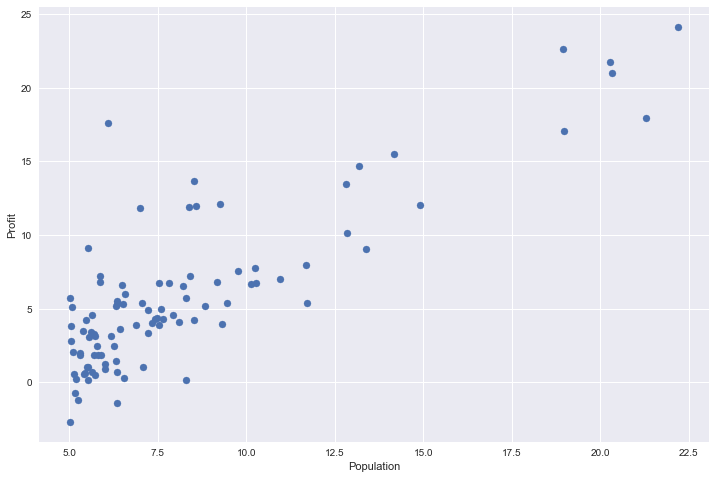

In [230]:
fig = plt.figure(figsize=(12, 8))
ax = plt.axes()

ax.scatter(data['Population'], data['Profit'])
ax.set_xlabel('Population')
ax.set_ylabel('Profit');

We'll create a column of ones to use it for regression

In [28]:
ones = np.ones(data['Population'].shape[0])
data['ones'] = ones
del(ones) #remove unused items
data.head()

,Population,Profit,ones
0,6.1101,17.5920,1.0
1,5.5277,9.1302,1.0
2,8.5186,13.6620,1.0
3,7.0032,11.8540,1.0
4,5.8598,6.8233,1.0


I would like to make the last column as the first column. Applying a method I have seen on stackoverflow:

In [46]:
cols = list(data.columns)
cols = cols[-1:] + cols[:-1]
data = data[cols]
#del(cols)
data.head() 
#You can run this only once. As you run this code, it will take the last column and make it the first one

,ones,Population,Profit
0,1.0,6.1101,17.5920
1,1.0,5.5277,9.1302
2,1.0,8.5186,13.6620
3,1.0,7.0032,11.8540
4,1.0,5.8598,6.8233


In [65]:
#Set explanatory values and explained values
X = data[cols[:-1]]
y = data[cols[-1:]]
print(X.head(3))
print(y.head(3))

   ones  Population
0   1.0      6.1101
1   1.0      5.5277
2   1.0      8.5186
    Profit
0  17.5920
1   9.1302
2  13.6620


Finally convert the panda dataframes to numpy matrices as we will insert them into our functions


In [66]:
X = np.matrix(X.values)
y = np.matrix(y.values)
#check the dimensions
X.shape, y.shape

((97, 2), (97, 1))

We'll finally start writing our cost function.

In [84]:
def cost_function(X, y, theta):
    """
    X is an n x k matrix of explanatory variables
    y is a n x 1 matrix of explained variables
    theta is a k x 1 matrix of multipliers for linear function
    """
    s = np.power(np.dot(X, theta) - y, 2)
    return np.sum(s) / (2 * X.shape[0])

Note: Normally we are supposed to take the root of np.sum(s) part according to definition of "root of mean square error". But keeping it as it is doesn't affect the minimization problem. 

We'll try the cost function on the initial guess of theta = (0, 0).

In [85]:
theta = np.zeros(2).reshape(2,1)
cost_function(X, y, theta)

32.072733877455676

This is basically the average of squared distance of y values to x axis (y = 0 line)

Now the most tricky part in this problem set. We are going to apply gradient descent. 

In [190]:
def gradient_descent(X, y, theta, alpha):
    """
    This function will take in theta value and update it to a new one 
    according to gradient descent
    """
    errors = np.dot(X, theta) - y
    #errors will be calculated more than once, so let's do it once and store it
    temp_thet = np.zeros(theta.shape)
    for i, thet in enumerate(theta.ravel()): 
        #If not ravel, then it will take an array out of theta
        correction = np.sum(np.multiply(errors, X[:, i])) * alpha * (1.0 / X.shape[0])
        temp_thet[i, 0] = (thet - correction)
    return temp_thet

We can give it a try. Let's start with theta = (0, 0) and alpha = 0.01 and see what the result will be, along the cost of the new multipliers. 

In [195]:
theta = np.zeros(2).reshape(2,1)
print(gradient_descent(X, y, theta, alpha=0.01))
print(cost_function(X, y, gradient_descent(X, y, theta, alpha=0.01)))

[[ 0.05839135]
 [ 0.6532885 ]]
6.73719046487


Now let's iterate on theta values to find the optimal theta. Along the way we will record the values for cost function as well

In [278]:
iterations = 2500
alpha = 0.01
theta_1 = np.zeros(2).reshape(2,1)
cost_values = np.empty(iterations)
theta_values = np.empty((theta_1.shape[0], 1, iterations))

for i in range(iterations):
    cost_values[i] = cost_function(X, y, theta_1)
    theta_values[:, :, i] = theta_1
    theta_1 = gradient_descent(X, y, theta_1, alpha)
    
print(theta_1)
print(cost_function(X, y, theta_1))

[[-3.85208068]
 [ 1.18864349]]
4.4771452346


Now it is time to graph the linear function. We will first define the linear function:

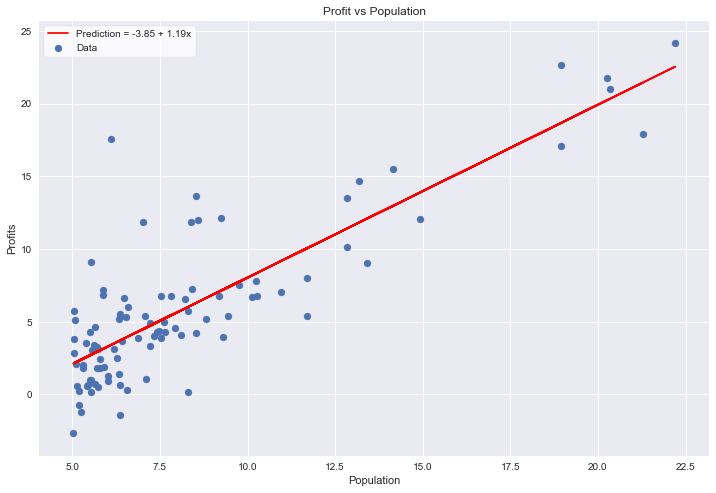

In [250]:
def lin_fun(X, theta):
    return np.dot(X, theta)

fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(X[:, 1], lin_fun(X, theta_1), color = 'r', 
        label = 'Prediction = %0.2f + %0.2fx'%(theta_1[0],theta_1[1]))
ax.scatter(X[:, 1], y, label = 'Data')
ax.legend(frameon = True, facecolor = "white")
#ax.set_xlabel('Population')
#ax.set_ylabel('Profit')
#ax.set_title('Profit vs Population');
#all of the commented above can be completed through ax.set
ax.set(xlabel = 'Population', ylabel = 'Profits',
      title = 'Profit vs Population');
#adding (xlim = (0, max(X[:, 1] + 2)), ylim = (-5, 25)) would set
#limits on x and y axes. Default limits are more aesthetic.

We can also graph the cost function and see how it evolved through our iterations. 
Since the first cost is very large compared to other cost values, I will limit the y axis to second greates value on our cost_values array. That way we can also look at how the sort works on numpy.

Here we encounter one of the pecularities of python/numpy and its sort function. It will sort your array, it will change it and it will leave it changed. I will create a copy array, sort it, extract the value then delete it. 

In [288]:
cop_array = cost_values.copy()
print(cost_values == cop_array) #this will show they are the same arrays
cop_array.sort()
print(cost_values == cop_array) #now they are not the same arrays
sec_val = cop_array[-2]
del(cop_array)
sec_val

[ True  True  True ...,  True  True  True]
[False False False ..., False False False]


6.7371904648700074

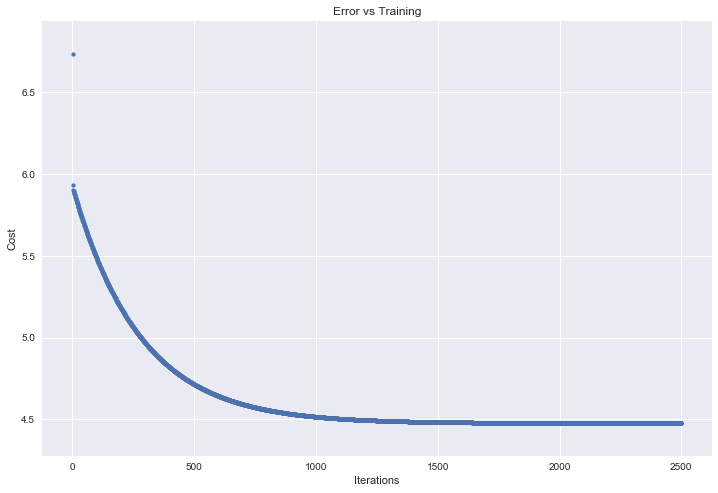

In [296]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(np.arange(1, iterations + 1), cost_values, s = 15)
ax.set(ylim = (min(cost_values) - 0.2, sec_val + 0.2))
ax.set(xlabel = 'Iterations', ylabel = 'Cost',
      title = 'Error vs Training');